In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('E:\\hackathon\\karnataka\\nypd.csv')

In [51]:
df.head()

CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0    269235387         42.0     BRONX   06/03/2023     01:00:00          NaN   
1    262102261         43.0     BRONX   01/18/2023     14:00:00          NaN   
2    267972239         43.0     BRONX   05/07/2023     00:15:00          NaN   
3  263141402H1          NaN  BROOKLYN   02/06/2023     10:16:00          NaN   
4  269307857H1          NaN  BROOKLYN   06/04/2023     00:20:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0       (null)        COMPLETED     (null)          NaN  ...   
1       (null)        COMPLETED     (null)          NaN  ...   
2       (null)        COMPLETED     (null)          NaN  ...   
3       (null)        COMPLETED     (null)          NaN  ...   
4       (null)        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP        VIC_RACE VIC_SEX X_COORD_CD  \
0               NaN         25-44  BLACK HISPANIC       M  1011982.0   
1               NaN       UNKNOWN         UNKNOWN       E  1019635.0   
2               NaN         25-44           BLACK       F  1022051.0   
3               NaN         18-24           BLACK       M        NaN   
4               NaN         25-44           BLACK       M        NaN   

  Y_COORD_CD   Latitude  Longitude                      Lat_Lon  \
0   239520.0  40.824059 -73.899799  (40.82405906, -73.89979939)   
1   243829.0  40.835859 -73.872125  (40.83585867, -73.87212505)   
2   242244.0  40.831500 -73.863400          (40.8315, -73.8634)   
3        NaN        NaN        NaN                          NaN   
4        NaN        NaN        NaN                          NaN   

           New Georeferenced Column  
0  POINT (-73.89979939 40.82405906)  
1  POINT (-73.87212505 40.83585867)  
2          POINT (-73.8634 40.8315)  
3                               NaN  
4                               NaN  

[5 rows x 36 columns]

In [52]:
column_name = 'OFNS_DESC'
value_counts = df[column_name].value_counts()
print(value_counts)

OFNS_DESC
PETIT LARCENY                     110081
HARRASSMENT 2                      83954
ASSAULT 3 & RELATED OFFENSES       58322
GRAND LARCENY                      50514
CRIMINAL MISCHIEF & RELATED OF     42339
                                   ...  
DISRUPTION OF A RELIGIOUS SERV         2
FORTUNE TELLING                        1
HOMICIDE-NEGLIGENT-VEHICLE             1
OTHER TRAFFIC INFRACTION               1
LOITERING                              1
Name: count, Length: 64, dtype: int64


In [53]:
unique_values_count = df[column_name].nunique()
print(unique_values_count)

64


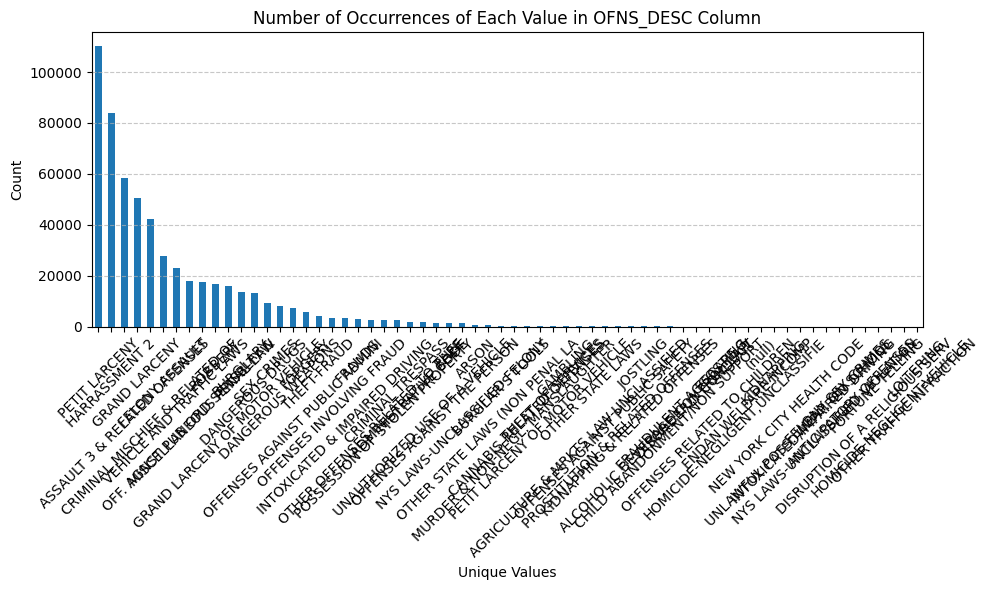

In [54]:
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
value_counts = df[column_name].value_counts(normalize=True)
cumulative_sum = value_counts.cumsum()
filtered_values = cumulative_sum[cumulative_sum <= 0.9]
selected_values = filtered_values.index.tolist()
filtered_df = df[df[column_name].isin(selected_values)]

In [56]:
unique_values_count = filtered_df[column_name].nunique()
print(unique_values_count)
value_counts = filtered_df[column_name].value_counts(normalize=True)

13


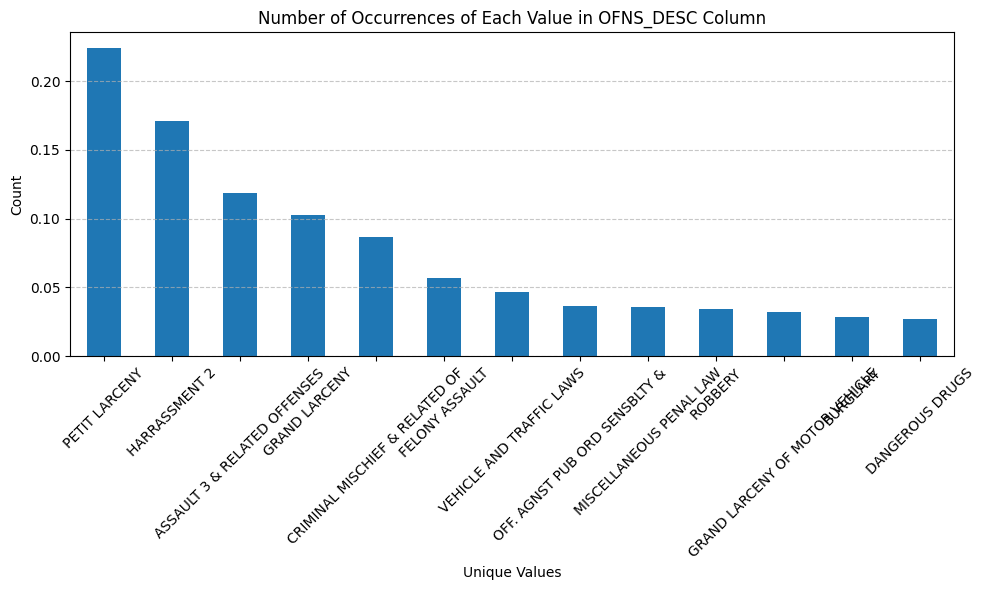

In [57]:
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
date_column_name = 'CMPLNT_FR_DT'
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce', format='%m/%d/%Y')
df['Day_of_Week'] = df[date_column_name].dt.day_name()
df.head()

CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0    269235387         42.0     BRONX   2023-06-03     01:00:00          NaN   
1    262102261         43.0     BRONX   2023-01-18     14:00:00          NaN   
2    267972239         43.0     BRONX   2023-05-07     00:15:00          NaN   
3  263141402H1          NaN  BROOKLYN   2023-02-06     10:16:00          NaN   
4  269307857H1          NaN  BROOKLYN   2023-06-04     00:20:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  VIC_AGE_GROUP  \
0       (null)        COMPLETED     (null)          NaN  ...          25-44   
1       (null)        COMPLETED     (null)          NaN  ...        UNKNOWN   
2       (null)        COMPLETED     (null)          NaN  ...          25-44   
3       (null)        COMPLETED     (null)          NaN  ...          18-24   
4       (null)        COMPLETED     (null)          NaN  ...          25-44   

         VIC_RACE  VIC_SEX X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0  BLACK HISPANIC        M  1011982.0   239520.0  40.824059 -73.899799   
1         UNKNOWN        E  1019635.0   243829.0  40.835859 -73.872125   
2           BLACK        F  1022051.0   242244.0  40.831500 -73.863400   
3           BLACK        M        NaN        NaN        NaN        NaN   
4           BLACK        M        NaN        NaN        NaN        NaN   

                       Lat_Lon          New Georeferenced Column Day_of_Week  
0  (40.82405906, -73.89979939)  POINT (-73.89979939 40.82405906)    Saturday  
1  (40.83585867, -73.87212505)  POINT (-73.87212505 40.83585867)   Wednesday  
2          (40.8315, -73.8634)          POINT (-73.8634 40.8315)      Sunday  
3                          NaN                               NaN      Monday  
4                          NaN                               NaN      Sunday  

[5 rows x 37 columns]

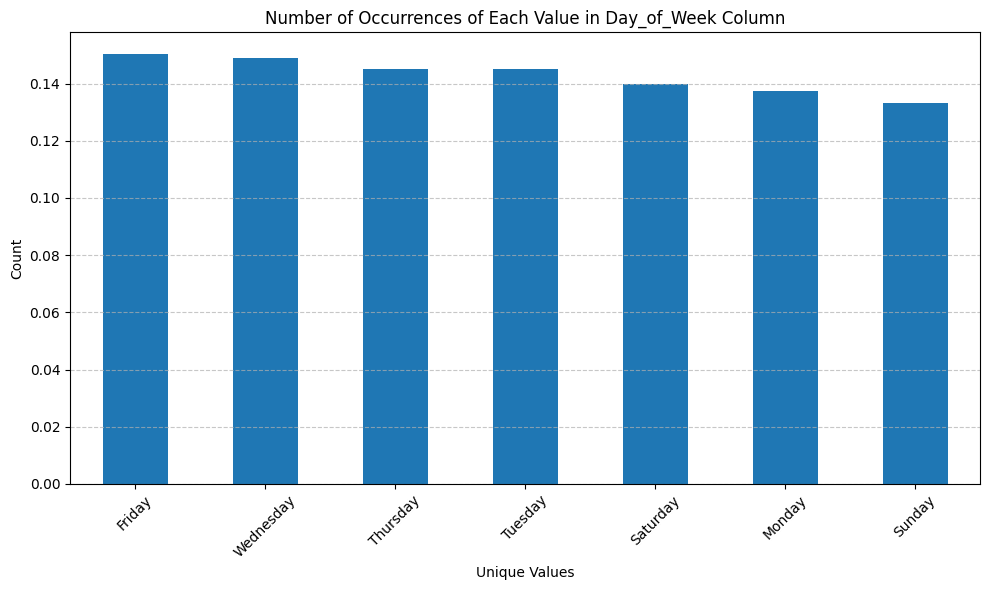

In [59]:
column_name = 'Day_of_Week'
value_counts2 = df[column_name].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
value_counts2.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

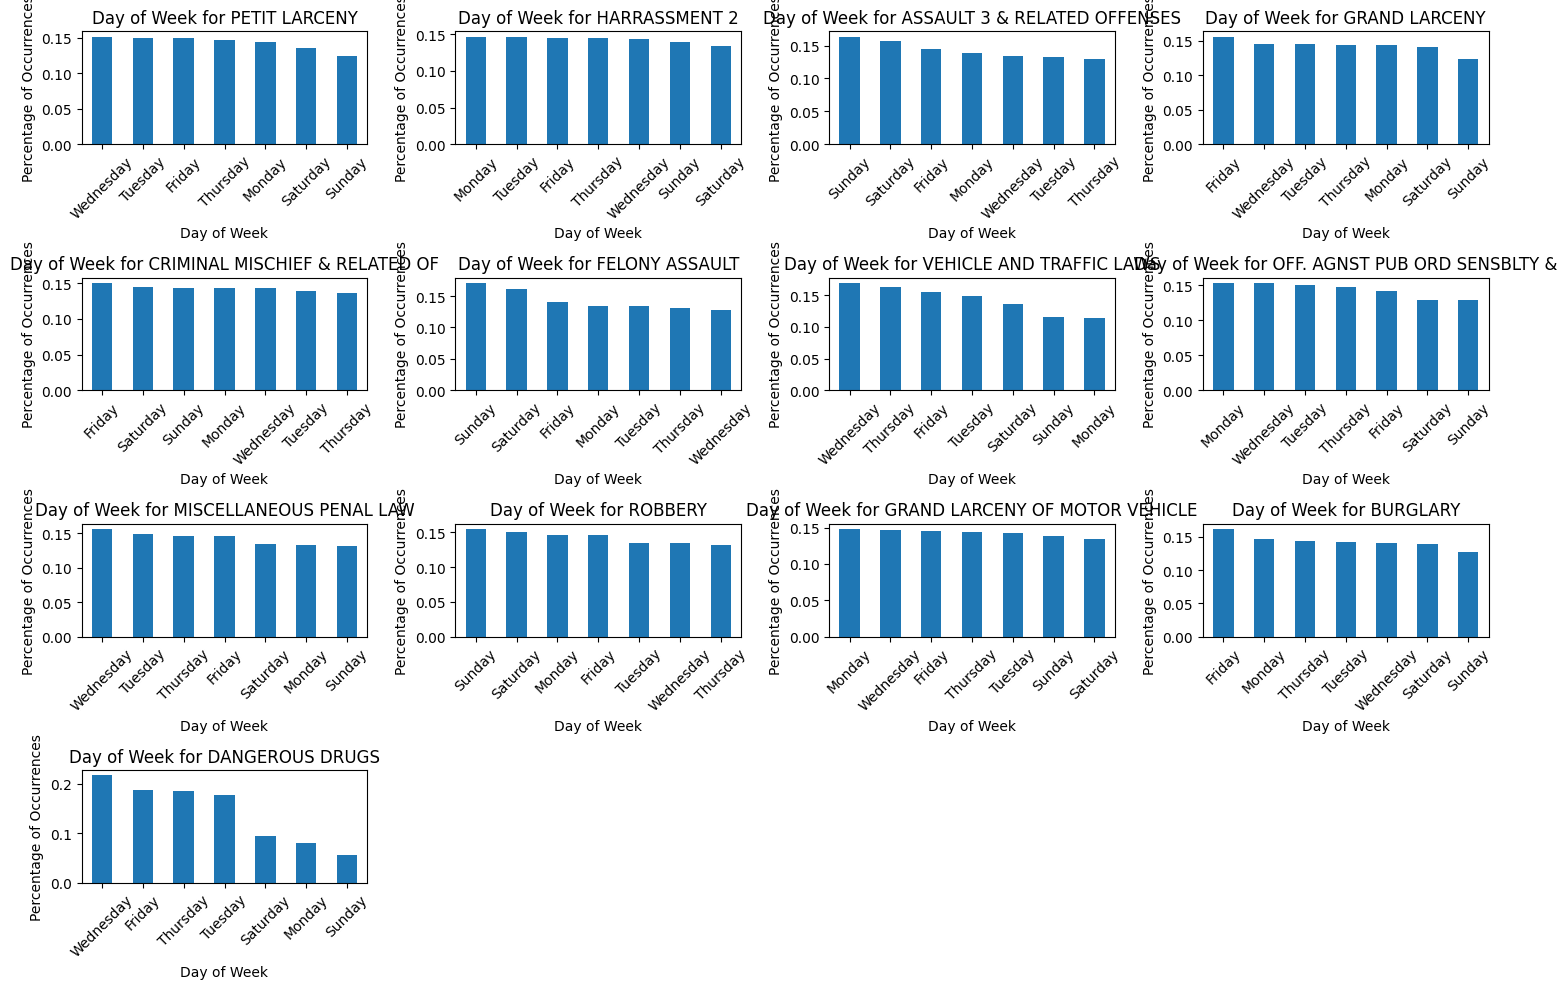

In [60]:
top_crimes = df['OFNS_DESC'].value_counts().head(13)

filtered_df = df[df['OFNS_DESC'].isin(top_crimes.index)]

plt.figure(figsize=(15, 10))

for i, (crime, _) in enumerate(top_crimes.items(), 1):
    plt.subplot(4, 4, i)
    crime_df = filtered_df[filtered_df['OFNS_DESC'] == crime]
    day_counts = crime_df['Day_of_Week'].value_counts(normalize=True)
    day_counts.plot(kind='bar')
    plt.title(f'Day of Week for {crime}')
    plt.xlabel('Day of Week')
    plt.ylabel('Percentage of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

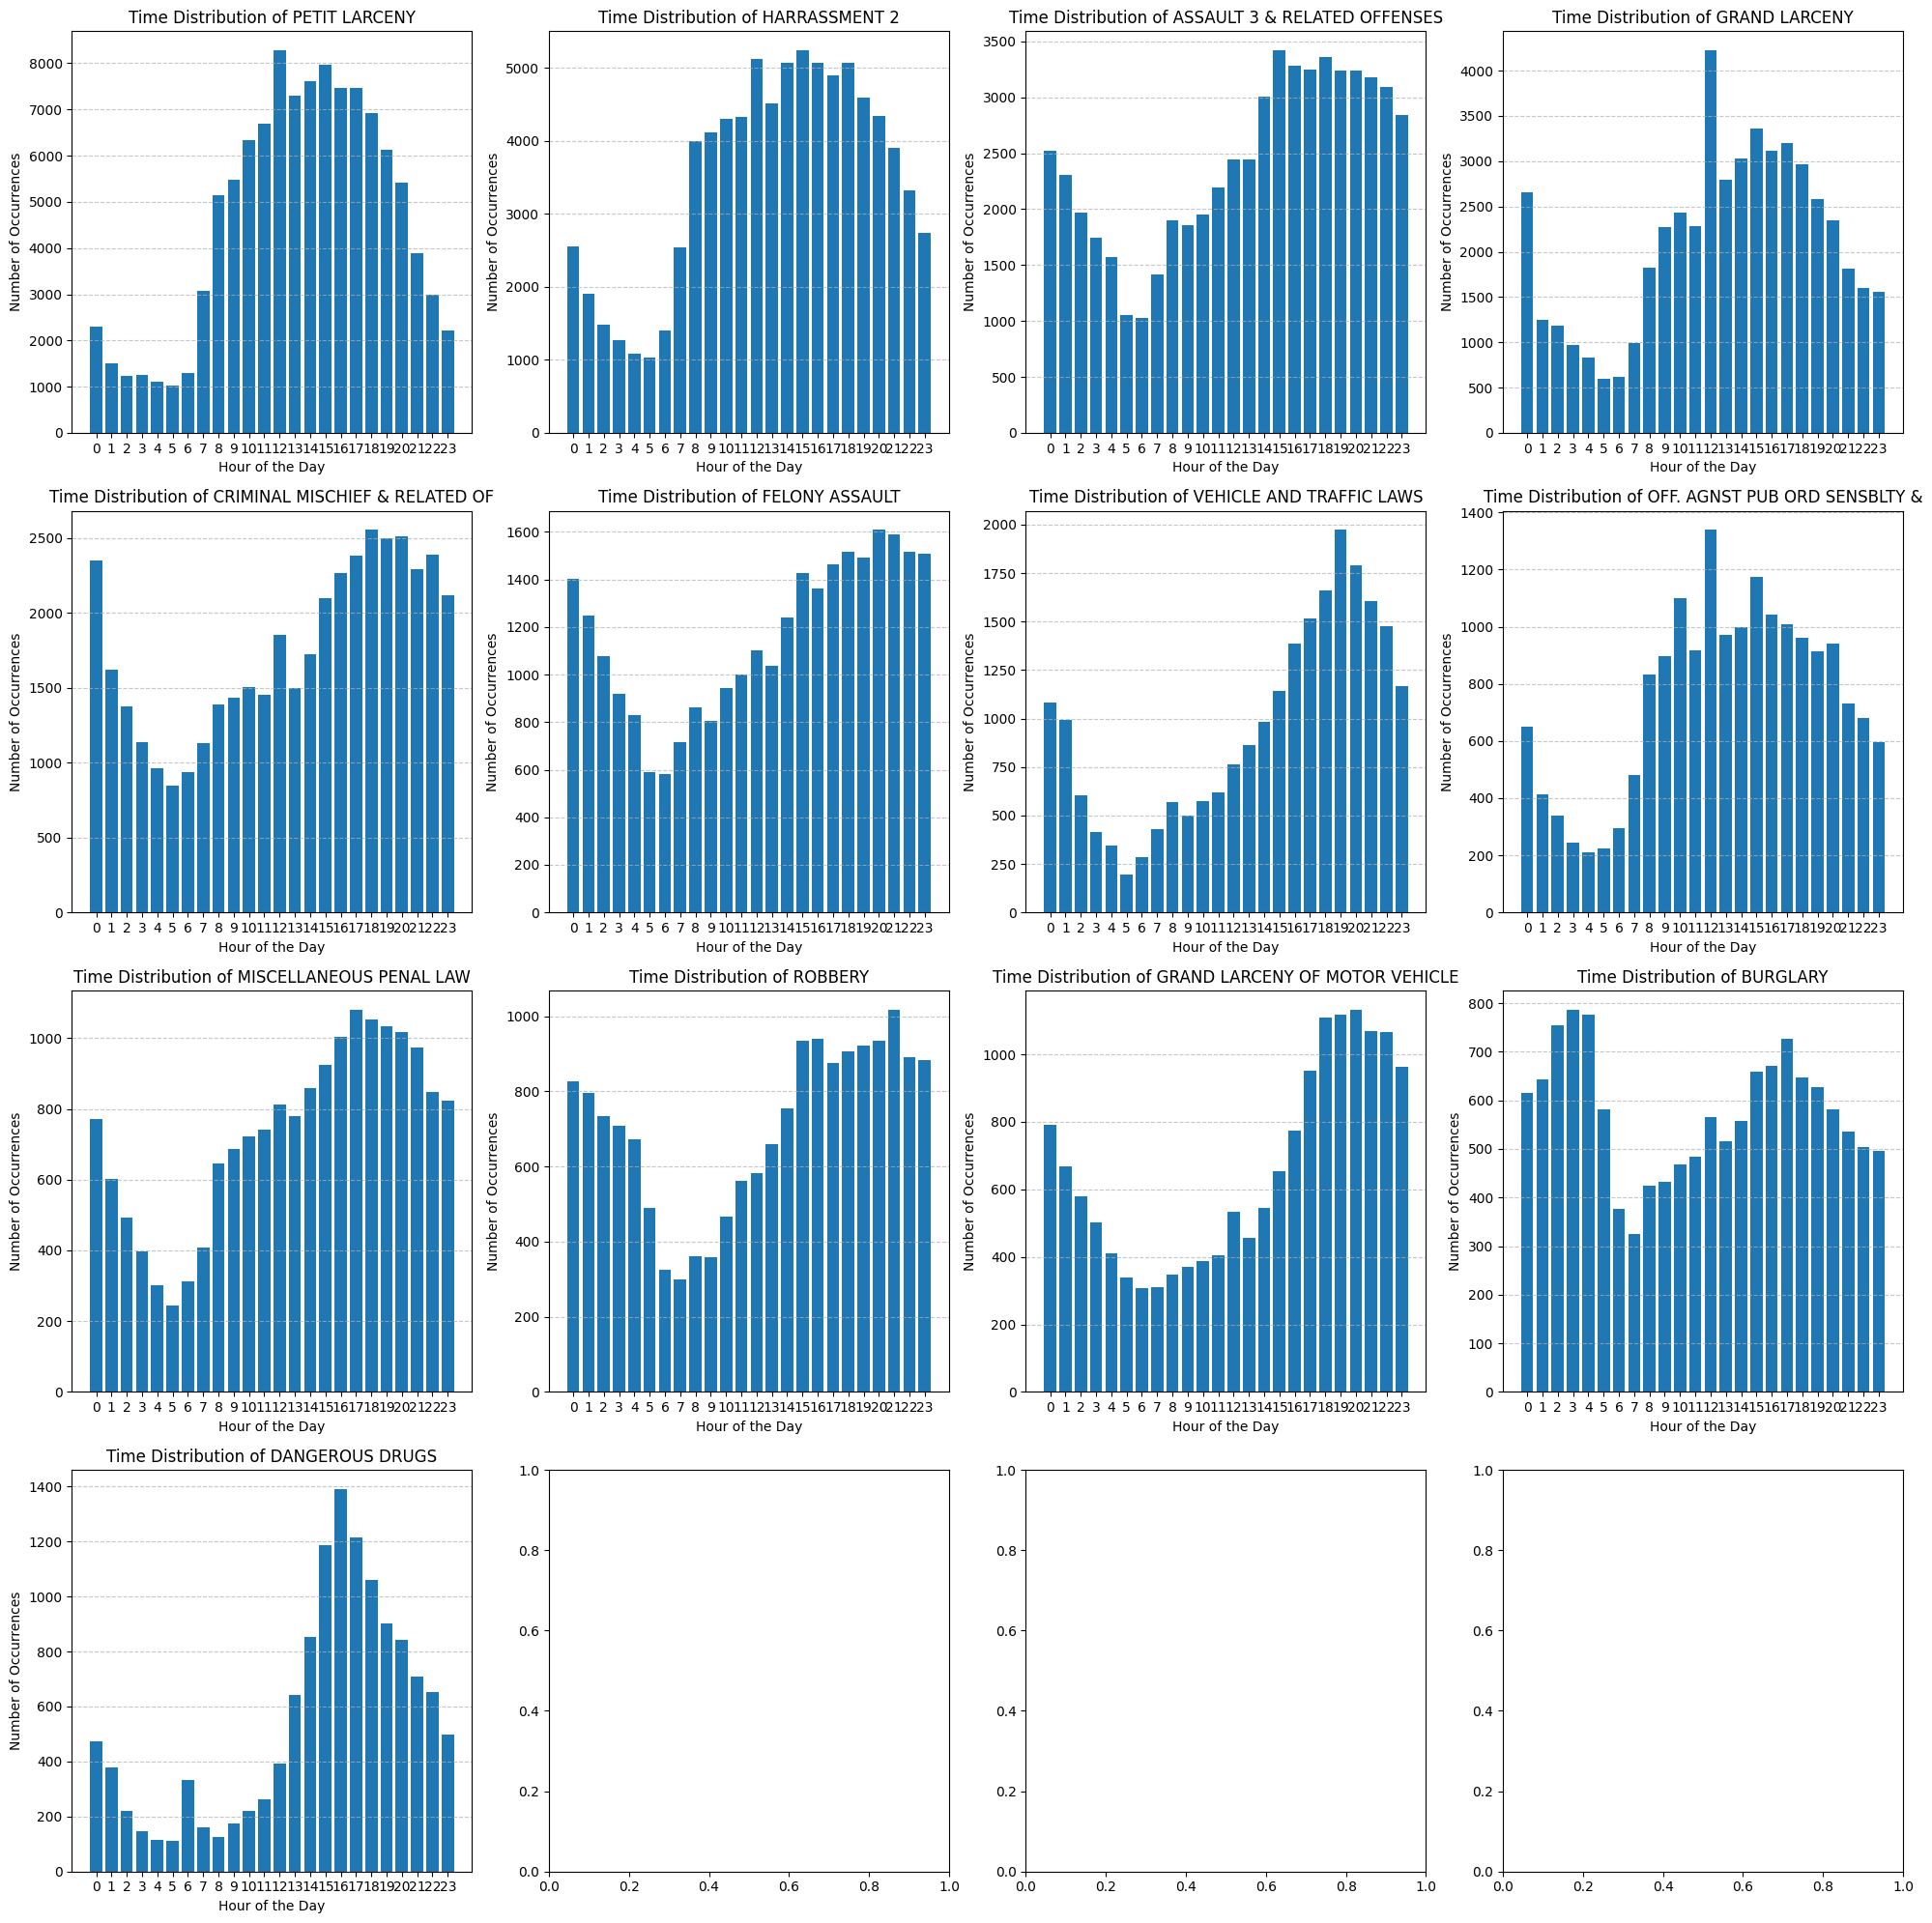

In [64]:
top_crimes = df['OFNS_DESC'].value_counts().head(13).index.tolist()

# Create subplots for each crime
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot time distribution for each crime
for i, crime in enumerate(top_crimes):
    # Filter the DataFrame for the current crime
    crime_df = df[df['OFNS_DESC'] == crime].copy()  # Ensure a copy of the DataFrame is created
    
    # Convert the CMPLNT_FR_TM column to datetime
    crime_df['CMPLNT_FR_TM'] = pd.to_datetime(crime_df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    
    # Extract the hour component from CMPLNT_FR_TM
    crime_df['Hour'] = crime_df['CMPLNT_FR_TM'].dt.hour
    
    # Count the number of occurrences for each hour
    hour_counts = crime_df['Hour'].value_counts().sort_index()
    
    # Plot the time distribution
    ax = axs[i]
    ax.bar(hour_counts.index, hour_counts.values)
    ax.set_title(f'Time Distribution of {crime}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Number of Occurrences')
    ax.set_xticks(range(24))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


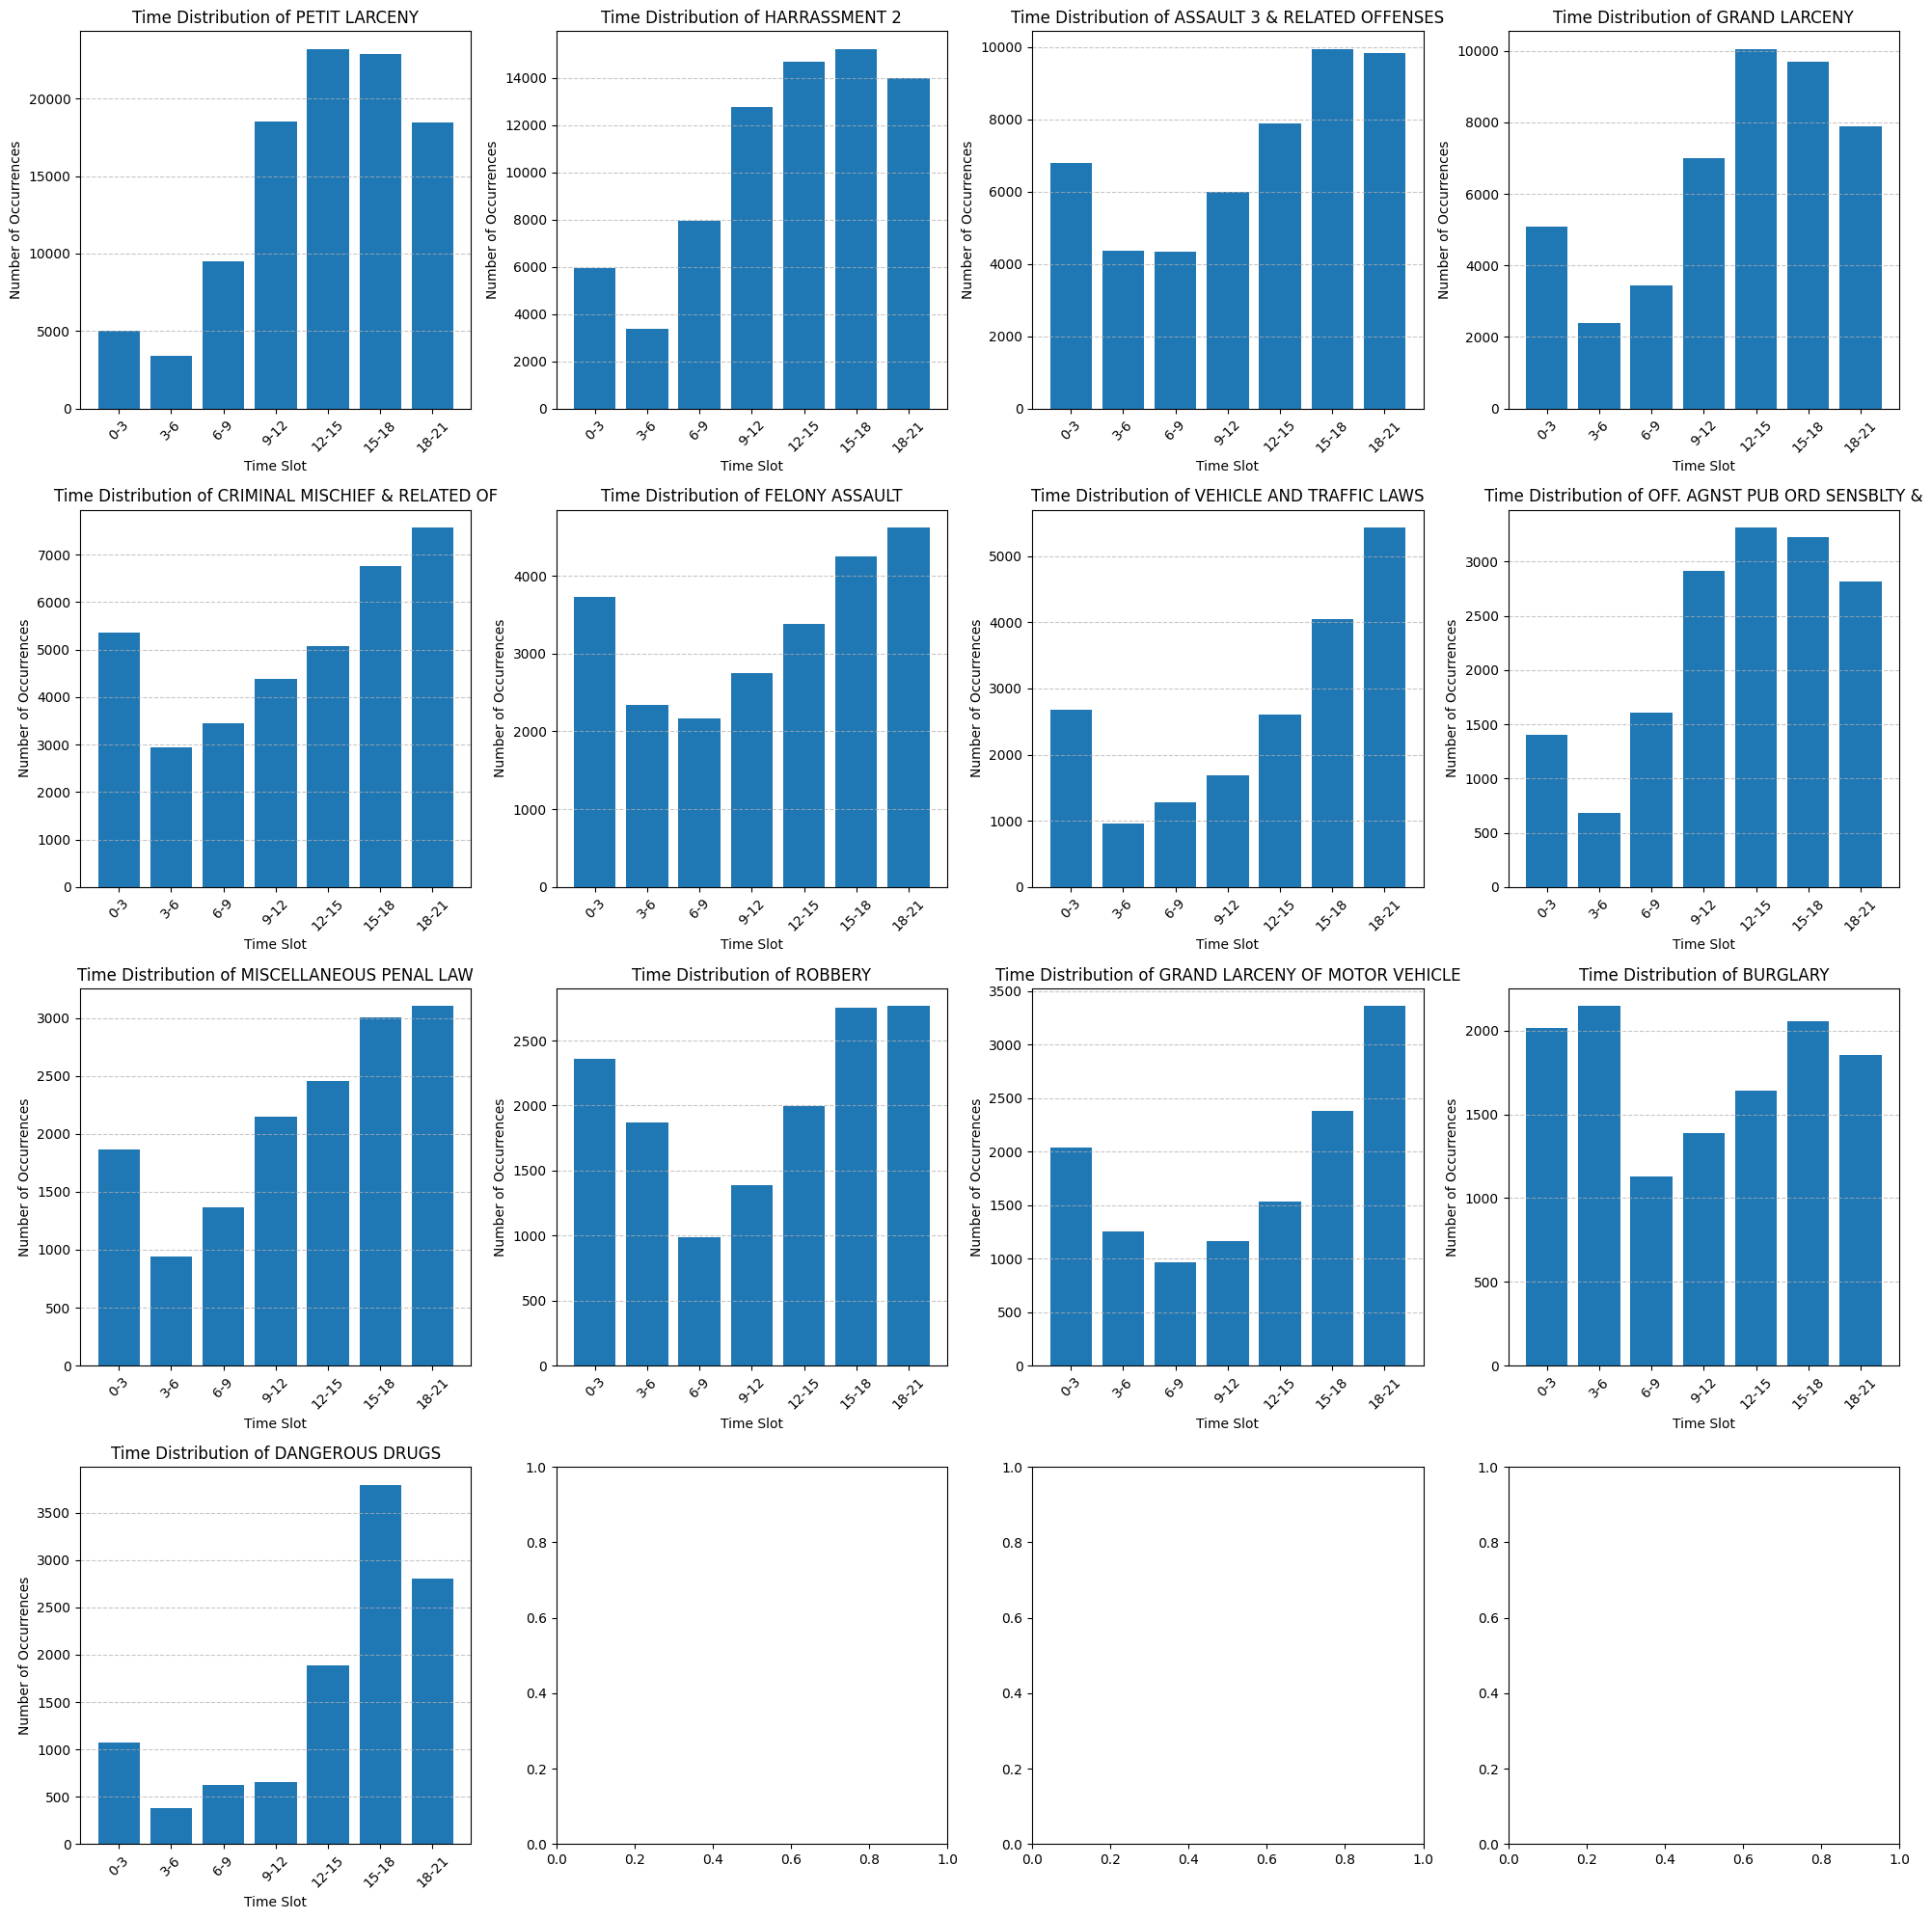

In [65]:
import numpy as np

# Define the time slots
time_slots = np.arange(0, 24, 3)

# Create subplots for each crime
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot time distribution for each crime
for i, crime in enumerate(top_crimes):
    # Filter the DataFrame for the current crime
    crime_df = df[df['OFNS_DESC'] == crime].copy()  # Ensure a copy of the DataFrame is created
    
    # Convert the CMPLNT_FR_TM column to datetime
    crime_df['CMPLNT_FR_TM'] = pd.to_datetime(crime_df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')
    
    # Extract the hour component from CMPLNT_FR_TM
    crime_df['Hour'] = crime_df['CMPLNT_FR_TM'].dt.hour
    
    # Create a new column for time slot
    crime_df['TimeSlot'] = pd.cut(crime_df['Hour'], bins=time_slots, right=False, labels=range(len(time_slots)-1))
    
    # Count the number of occurrences for each time slot
    time_slot_counts = crime_df['TimeSlot'].value_counts().sort_index()
    
    # Plot the time distribution
    ax = axs[i]
    ax.bar(time_slot_counts.index, time_slot_counts.values)
    ax.set_title(f'Time Distribution of {crime}')
    ax.set_xlabel('Time Slot')
    ax.set_ylabel('Number of Occurrences')
    ax.set_xticks(range(len(time_slots)-1))
    ax.set_xticklabels([f'{time_slots[i]}-{time_slots[i+1]}' for i in range(len(time_slots)-1)], rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [67]:
# Convert the values in CMPLNT_TO_DT to datetime objects
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')

# Convert the values in CMPLNT_FR_DT to datetime objects
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Fill missing values in CMPLNT_FR_DT with values from CMPLNT_TO_DT where CMPLNT_FR_DT is missing
df['CMPLNT_FR_DT'].fillna(df['CMPLNT_TO_DT'], inplace=True)

# Fill missing values in CMPLNT_TO_DT with values from CMPLNT_FR_DT where CMPLNT_TO_DT is missing
df['CMPLNT_TO_DT'].fillna(df['CMPLNT_FR_DT'], inplace=True)


In [68]:
df.head()

CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0    269235387         42.0     BRONX   2023-06-03     01:00:00   2023-06-03   
1    262102261         43.0     BRONX   2023-01-18     14:00:00   2023-01-18   
2    267972239         43.0     BRONX   2023-05-07     00:15:00   2023-05-07   
3  263141402H1          NaN  BROOKLYN   2023-02-06     10:16:00   2023-02-06   
4  269307857H1          NaN  BROOKLYN   2023-06-04     00:20:00   2023-06-04   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  VIC_AGE_GROUP  \
0       (null)        COMPLETED     (null)          NaN  ...          25-44   
1       (null)        COMPLETED     (null)          NaN  ...        UNKNOWN   
2       (null)        COMPLETED     (null)          NaN  ...          25-44   
3       (null)        COMPLETED     (null)          NaN  ...          18-24   
4       (null)        COMPLETED     (null)          NaN  ...          25-44   

         VIC_RACE  VIC_SEX X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0  BLACK HISPANIC        M  1011982.0   239520.0  40.824059 -73.899799   
1         UNKNOWN        E  1019635.0   243829.0  40.835859 -73.872125   
2           BLACK        F  1022051.0   242244.0  40.831500 -73.863400   
3           BLACK        M        NaN        NaN        NaN        NaN   
4           BLACK        M        NaN        NaN        NaN        NaN   

                       Lat_Lon          New Georeferenced Column Day_of_Week  
0  (40.82405906, -73.89979939)  POINT (-73.89979939 40.82405906)    Saturday  
1  (40.83585867, -73.87212505)  POINT (-73.87212505 40.83585867)   Wednesday  
2          (40.8315, -73.8634)          POINT (-73.8634 40.8315)      Sunday  
3                          NaN                               NaN      Monday  
4                          NaN                               NaN      Sunday  

[5 rows x 37 columns]

In [69]:
# Drop the columns CMPLNT_TO_DT and CMPLNT_TO_TM
df.drop(columns=['CMPLNT_TO_DT', 'CMPLNT_TO_TM'], inplace=True)


In [70]:
df.head()

CMPLNT_NUM  ADDR_PCT_CD   BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0    269235387         42.0     BRONX   2023-06-03     01:00:00   
1    262102261         43.0     BRONX   2023-01-18     14:00:00   
2    267972239         43.0     BRONX   2023-05-07     00:15:00   
3  263141402H1          NaN  BROOKLYN   2023-02-06     10:16:00   
4  269307857H1          NaN  BROOKLYN   2023-06-04     00:20:00   

  CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  JURISDICTION_CODE  \
0        COMPLETED     (null)          NaN                  0   
1        COMPLETED     (null)          NaN                  0   
2        COMPLETED     (null)          NaN                  0   
3        COMPLETED     (null)          NaN                  0   
4        COMPLETED     (null)          NaN                  0   

         JURIS_DESC  ...  VIC_AGE_GROUP        VIC_RACE VIC_SEX X_COORD_CD  \
0  N.Y. POLICE DEPT  ...          25-44  BLACK HISPANIC       M  1011982.0   
1  N.Y. POLICE DEPT  ...        UNKNOWN         UNKNOWN       E  1019635.0   
2  N.Y. POLICE DEPT  ...          25-44           BLACK       F  1022051.0   
3  N.Y. POLICE DEPT  ...          18-24           BLACK       M        NaN   
4  N.Y. POLICE DEPT  ...          25-44           BLACK       M        NaN   

  Y_COORD_CD   Latitude  Longitude                      Lat_Lon  \
0   239520.0  40.824059 -73.899799  (40.82405906, -73.89979939)   
1   243829.0  40.835859 -73.872125  (40.83585867, -73.87212505)   
2   242244.0  40.831500 -73.863400          (40.8315, -73.8634)   
3        NaN        NaN        NaN                          NaN   
4        NaN        NaN        NaN                          NaN   

           New Georeferenced Column Day_of_Week  
0  POINT (-73.89979939 40.82405906)    Saturday  
1  POINT (-73.87212505 40.83585867)   Wednesday  
2          POINT (-73.8634 40.8315)      Sunday  
3                               NaN      Monday  
4                               NaN      Sunday  

[5 rows x 35 columns]

In [72]:
column_name = 'JURIS_DESC'
unique_values_count = filtered_df[column_name].nunique()
print(unique_values_count)

22


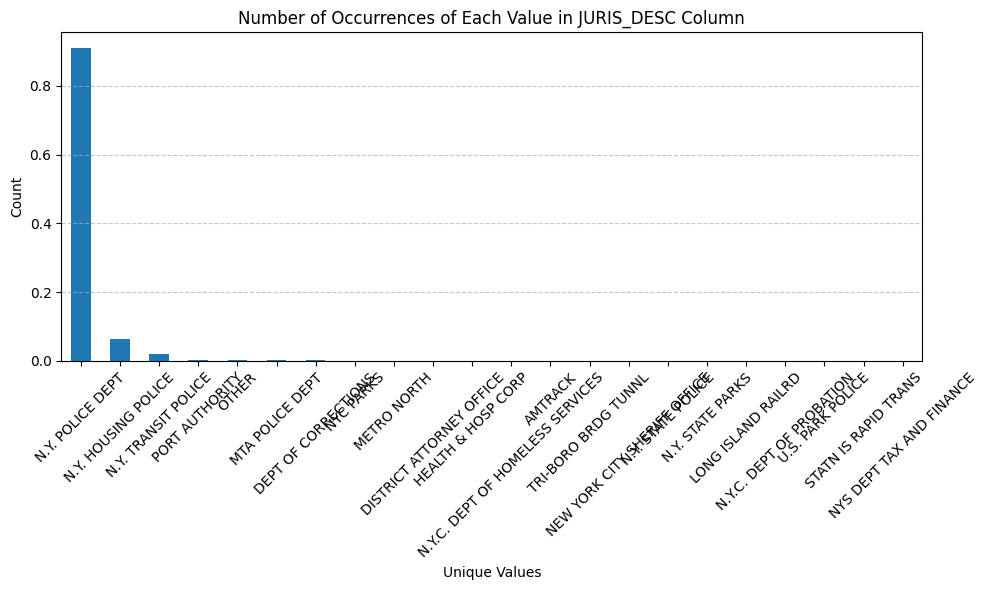

In [73]:
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

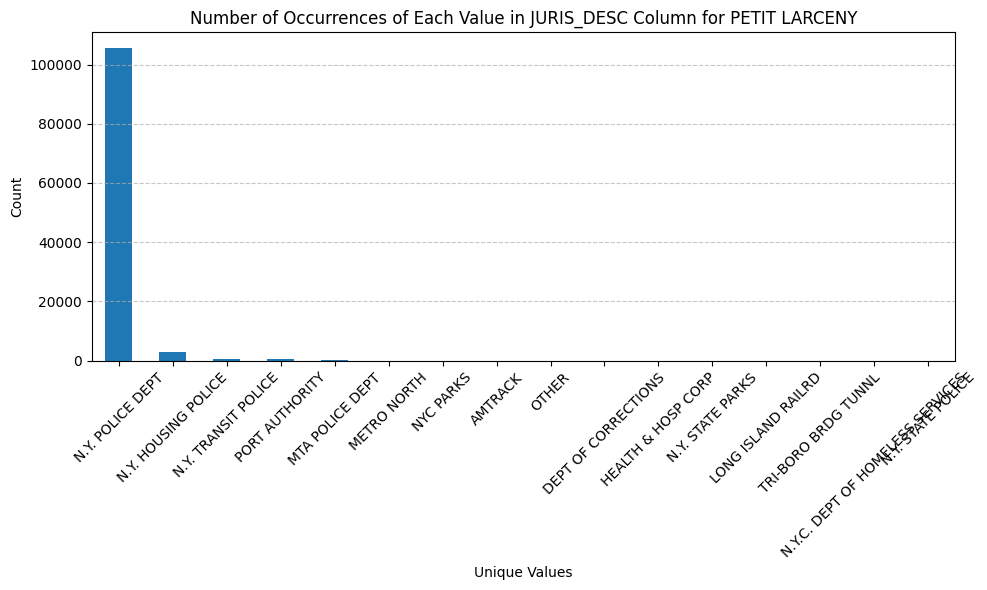

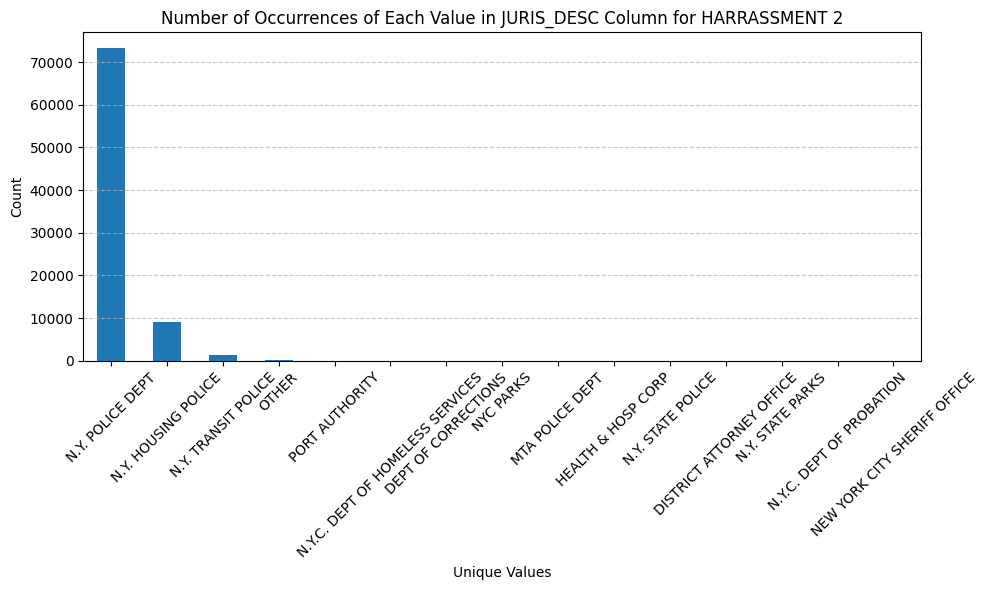

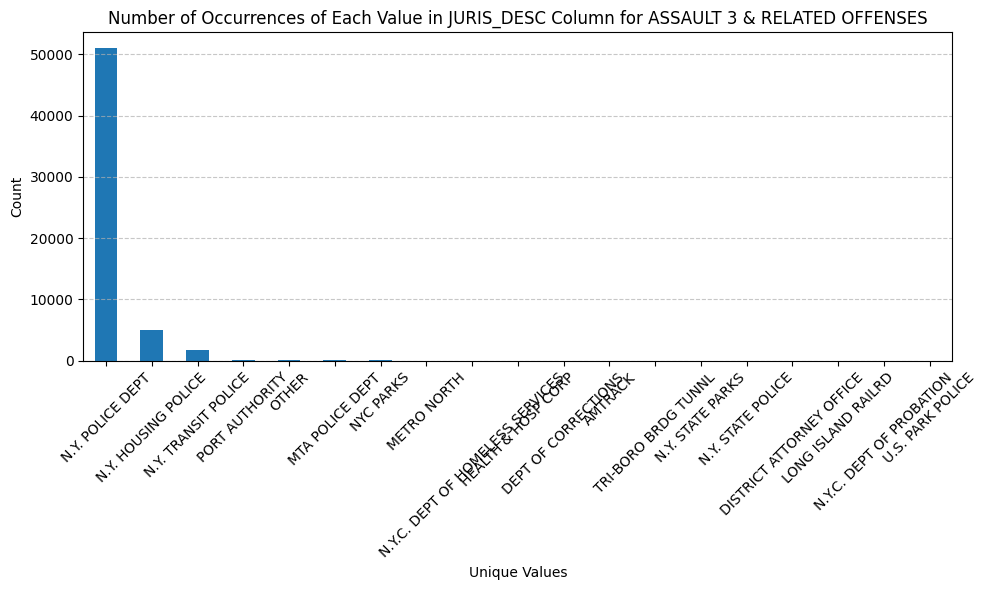

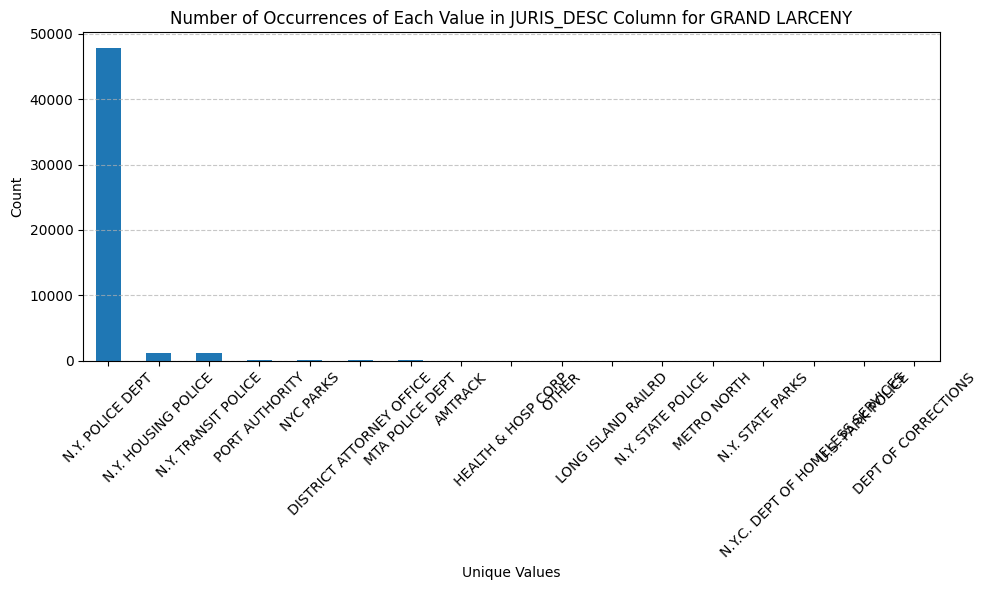

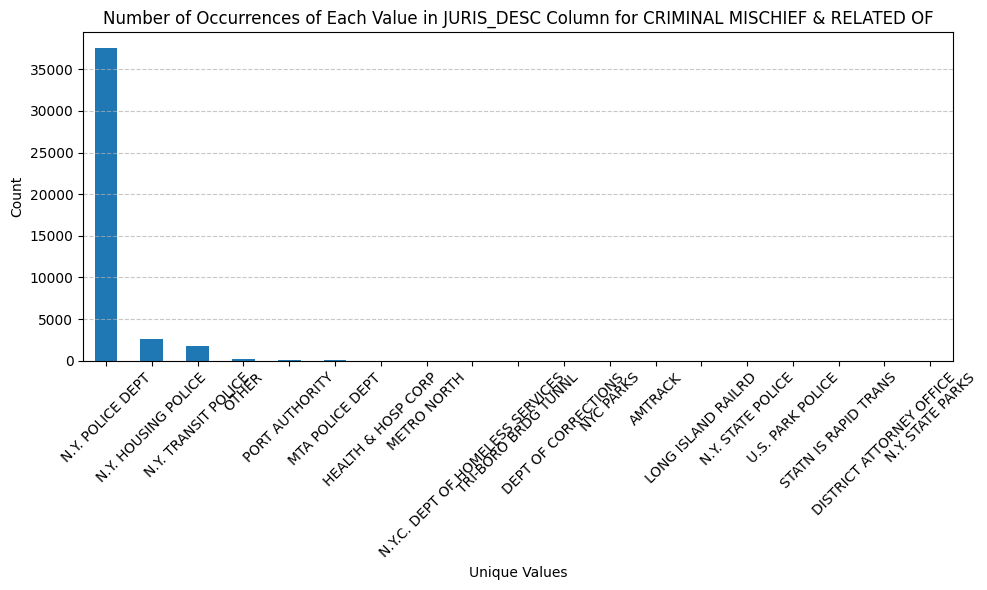

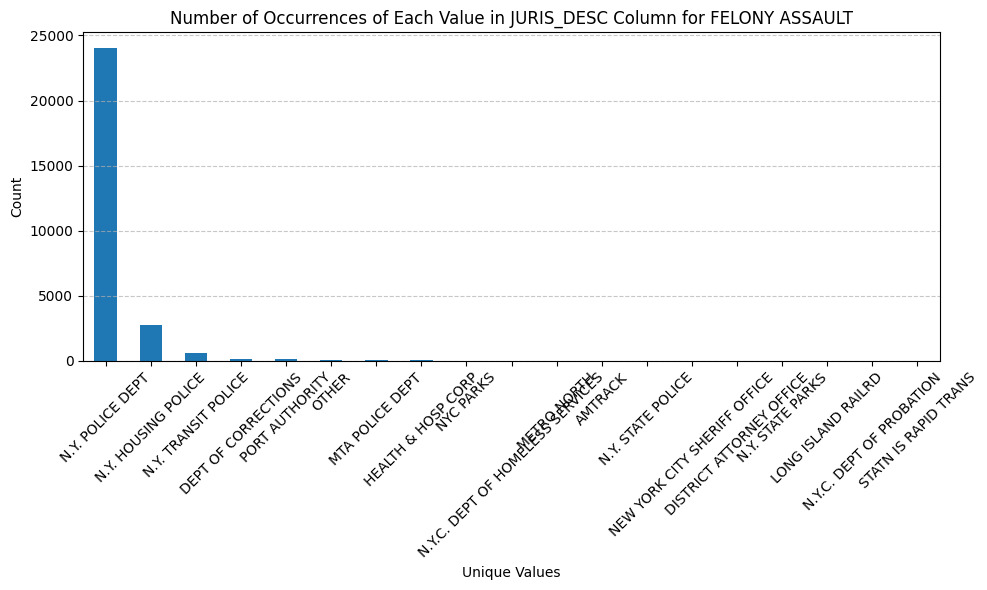

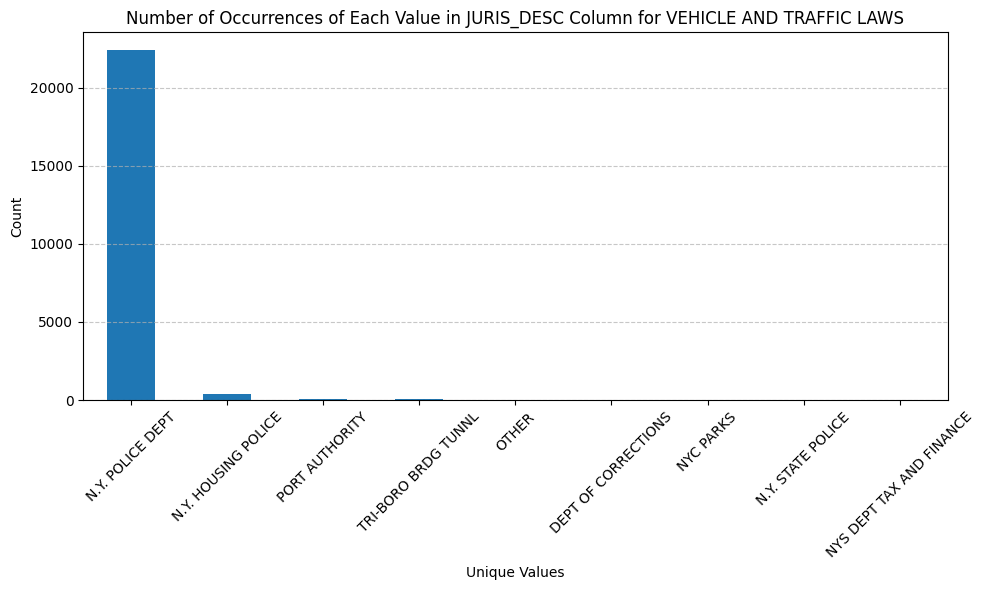

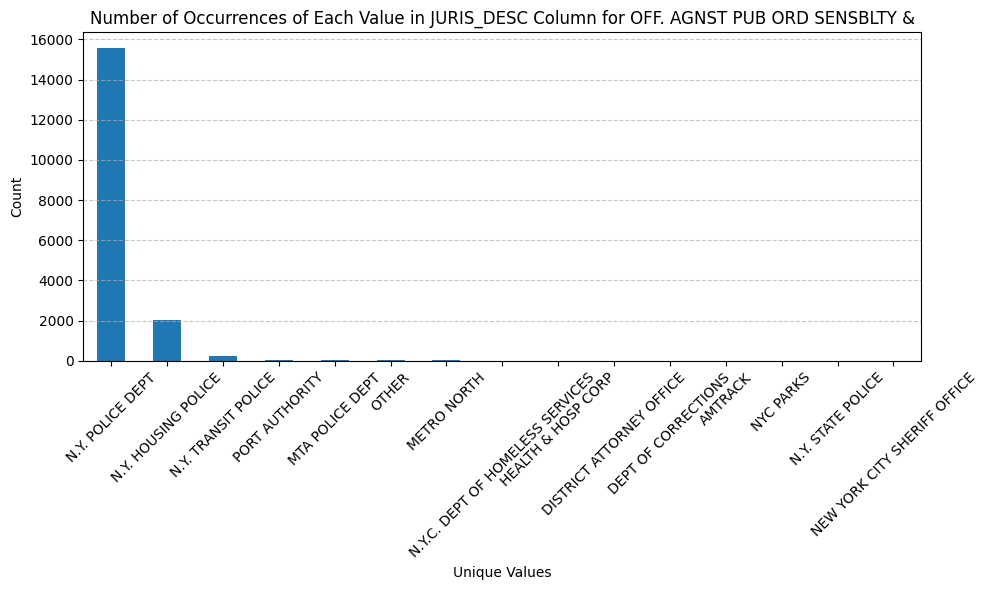

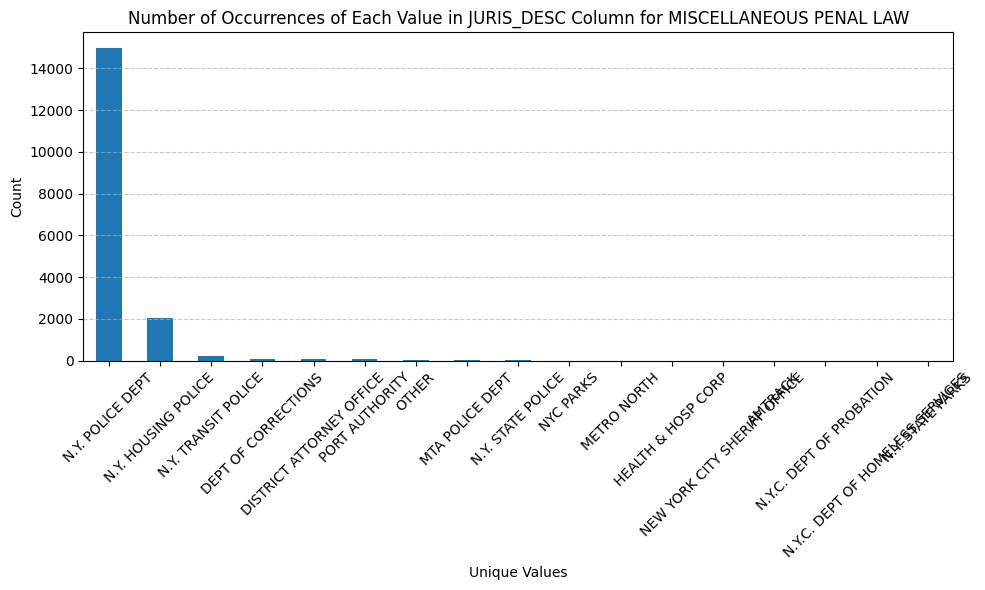

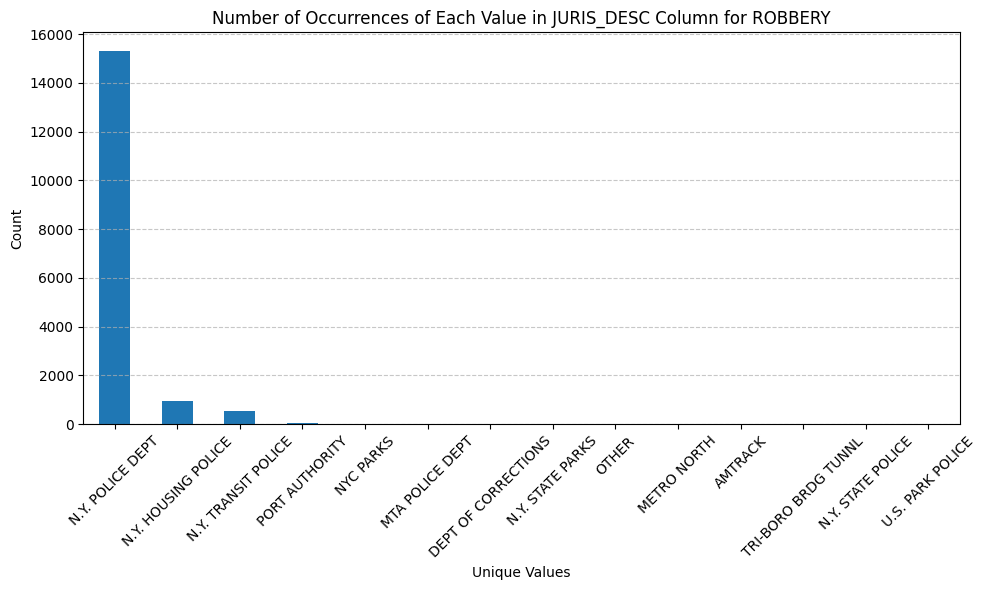

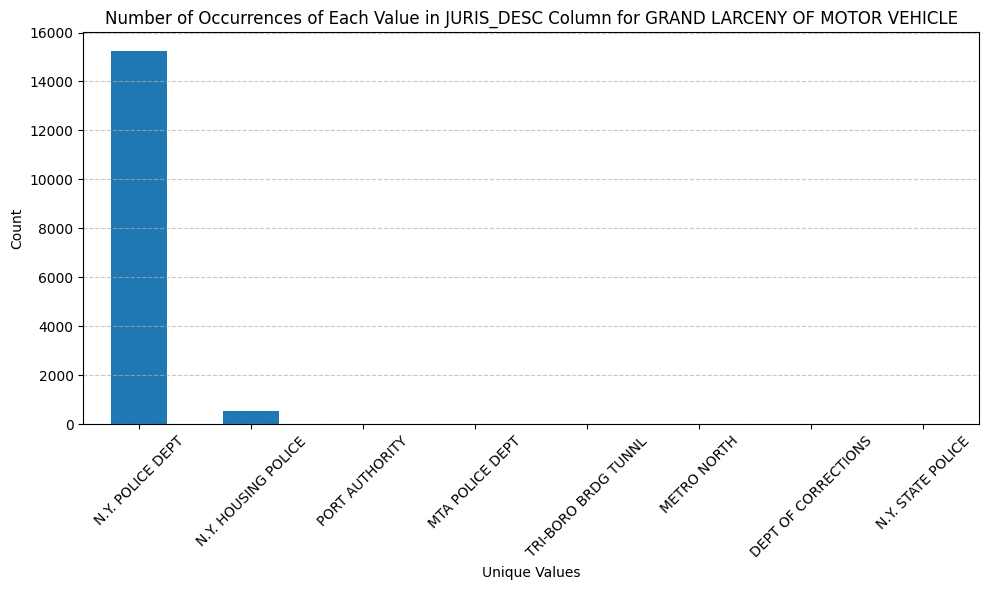

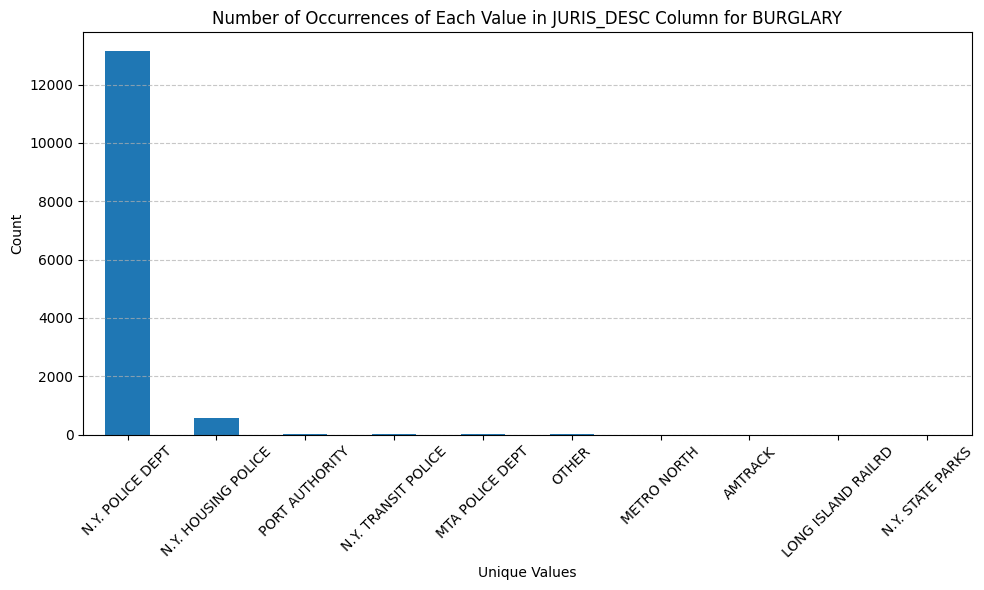

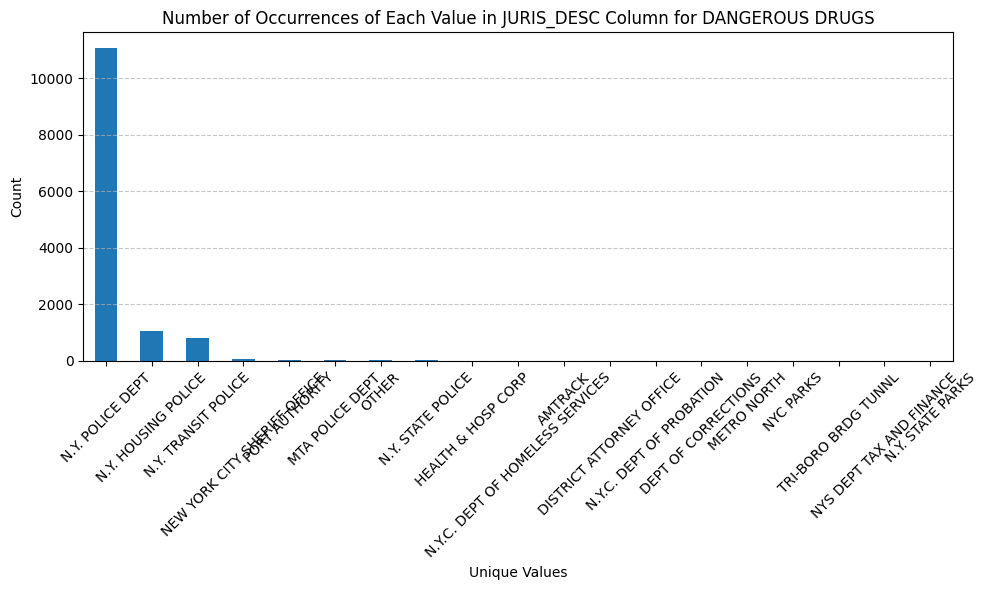

In [74]:
top_crimes = df['OFNS_DESC'].value_counts().head(13).index.tolist()

for crime in top_crimes:
    crime_df = filtered_df[filtered_df['OFNS_DESC'] == crime]
    plt.figure(figsize=(10, 6))
    value_counts = crime_df[column_name].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Number of Occurrences of Each Value in {column_name} Column for {crime}')
    plt.xlabel('Unique Values')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


C:\Users\abhip\AppData\Local\Temp\ipykernel_16168\935480713.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


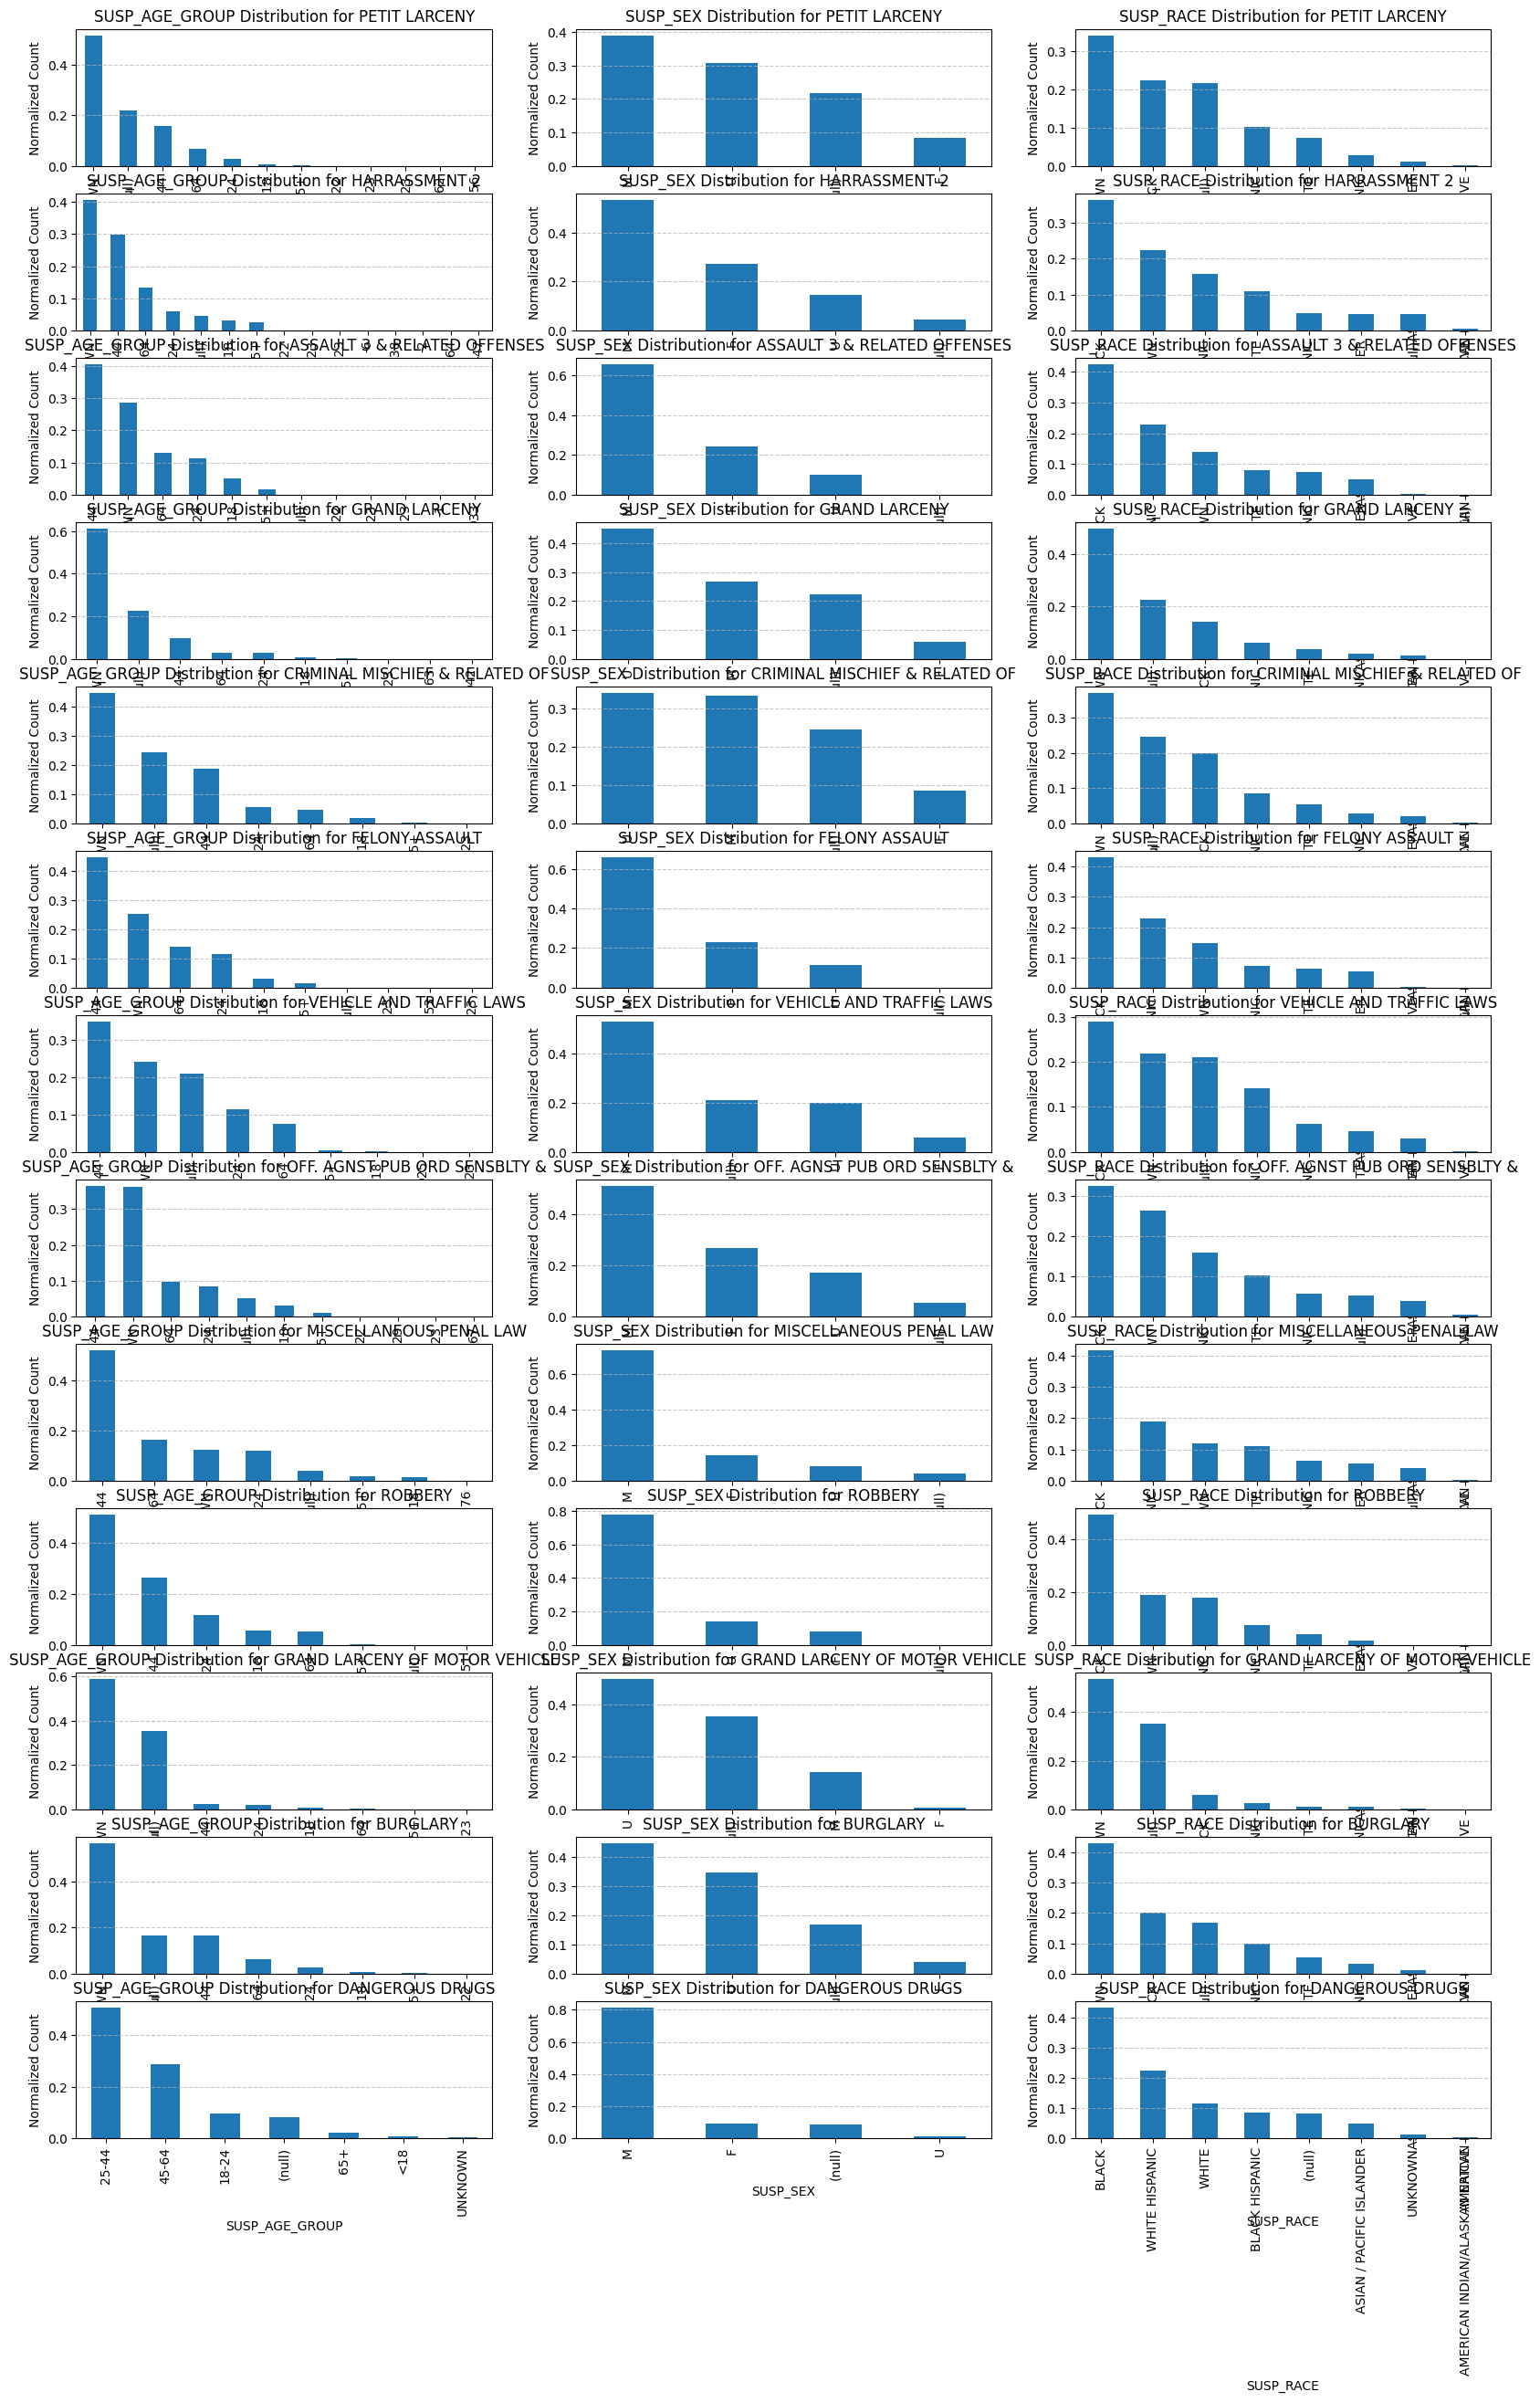

In [75]:
top_crimes = df['OFNS_DESC'].value_counts().head(13).index.tolist()

# Define the columns for age group, gender, and race
suspect_columns = ['SUSP_AGE_GROUP', 'SUSP_SEX', 'SUSP_RACE']

# Create subplots for each crime and each suspect attribute
fig, axs = plt.subplots(nrows=len(top_crimes), ncols=len(suspect_columns), figsize=(20, 30))

# Plot the distribution for each crime and each suspect attribute
for i, crime in enumerate(top_crimes):
    for j, column in enumerate(suspect_columns):
        # Filter the DataFrame for the current crime
        crime_df = df[df['OFNS_DESC'] == crime]
        
        # Count the occurrences of each value in the current column
        value_counts = crime_df[column].value_counts(normalize=True)
        
        # Plot the bar graph for the current attribute
        ax = axs[i, j] if len(top_crimes) > 1 else axs[j]
        value_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'{column} Distribution for {crime}')
        ax.set_xlabel(column)
        ax.set_ylabel('Normalized Count')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\abhip\AppData\Local\Temp\ipykernel_16168\210414541.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


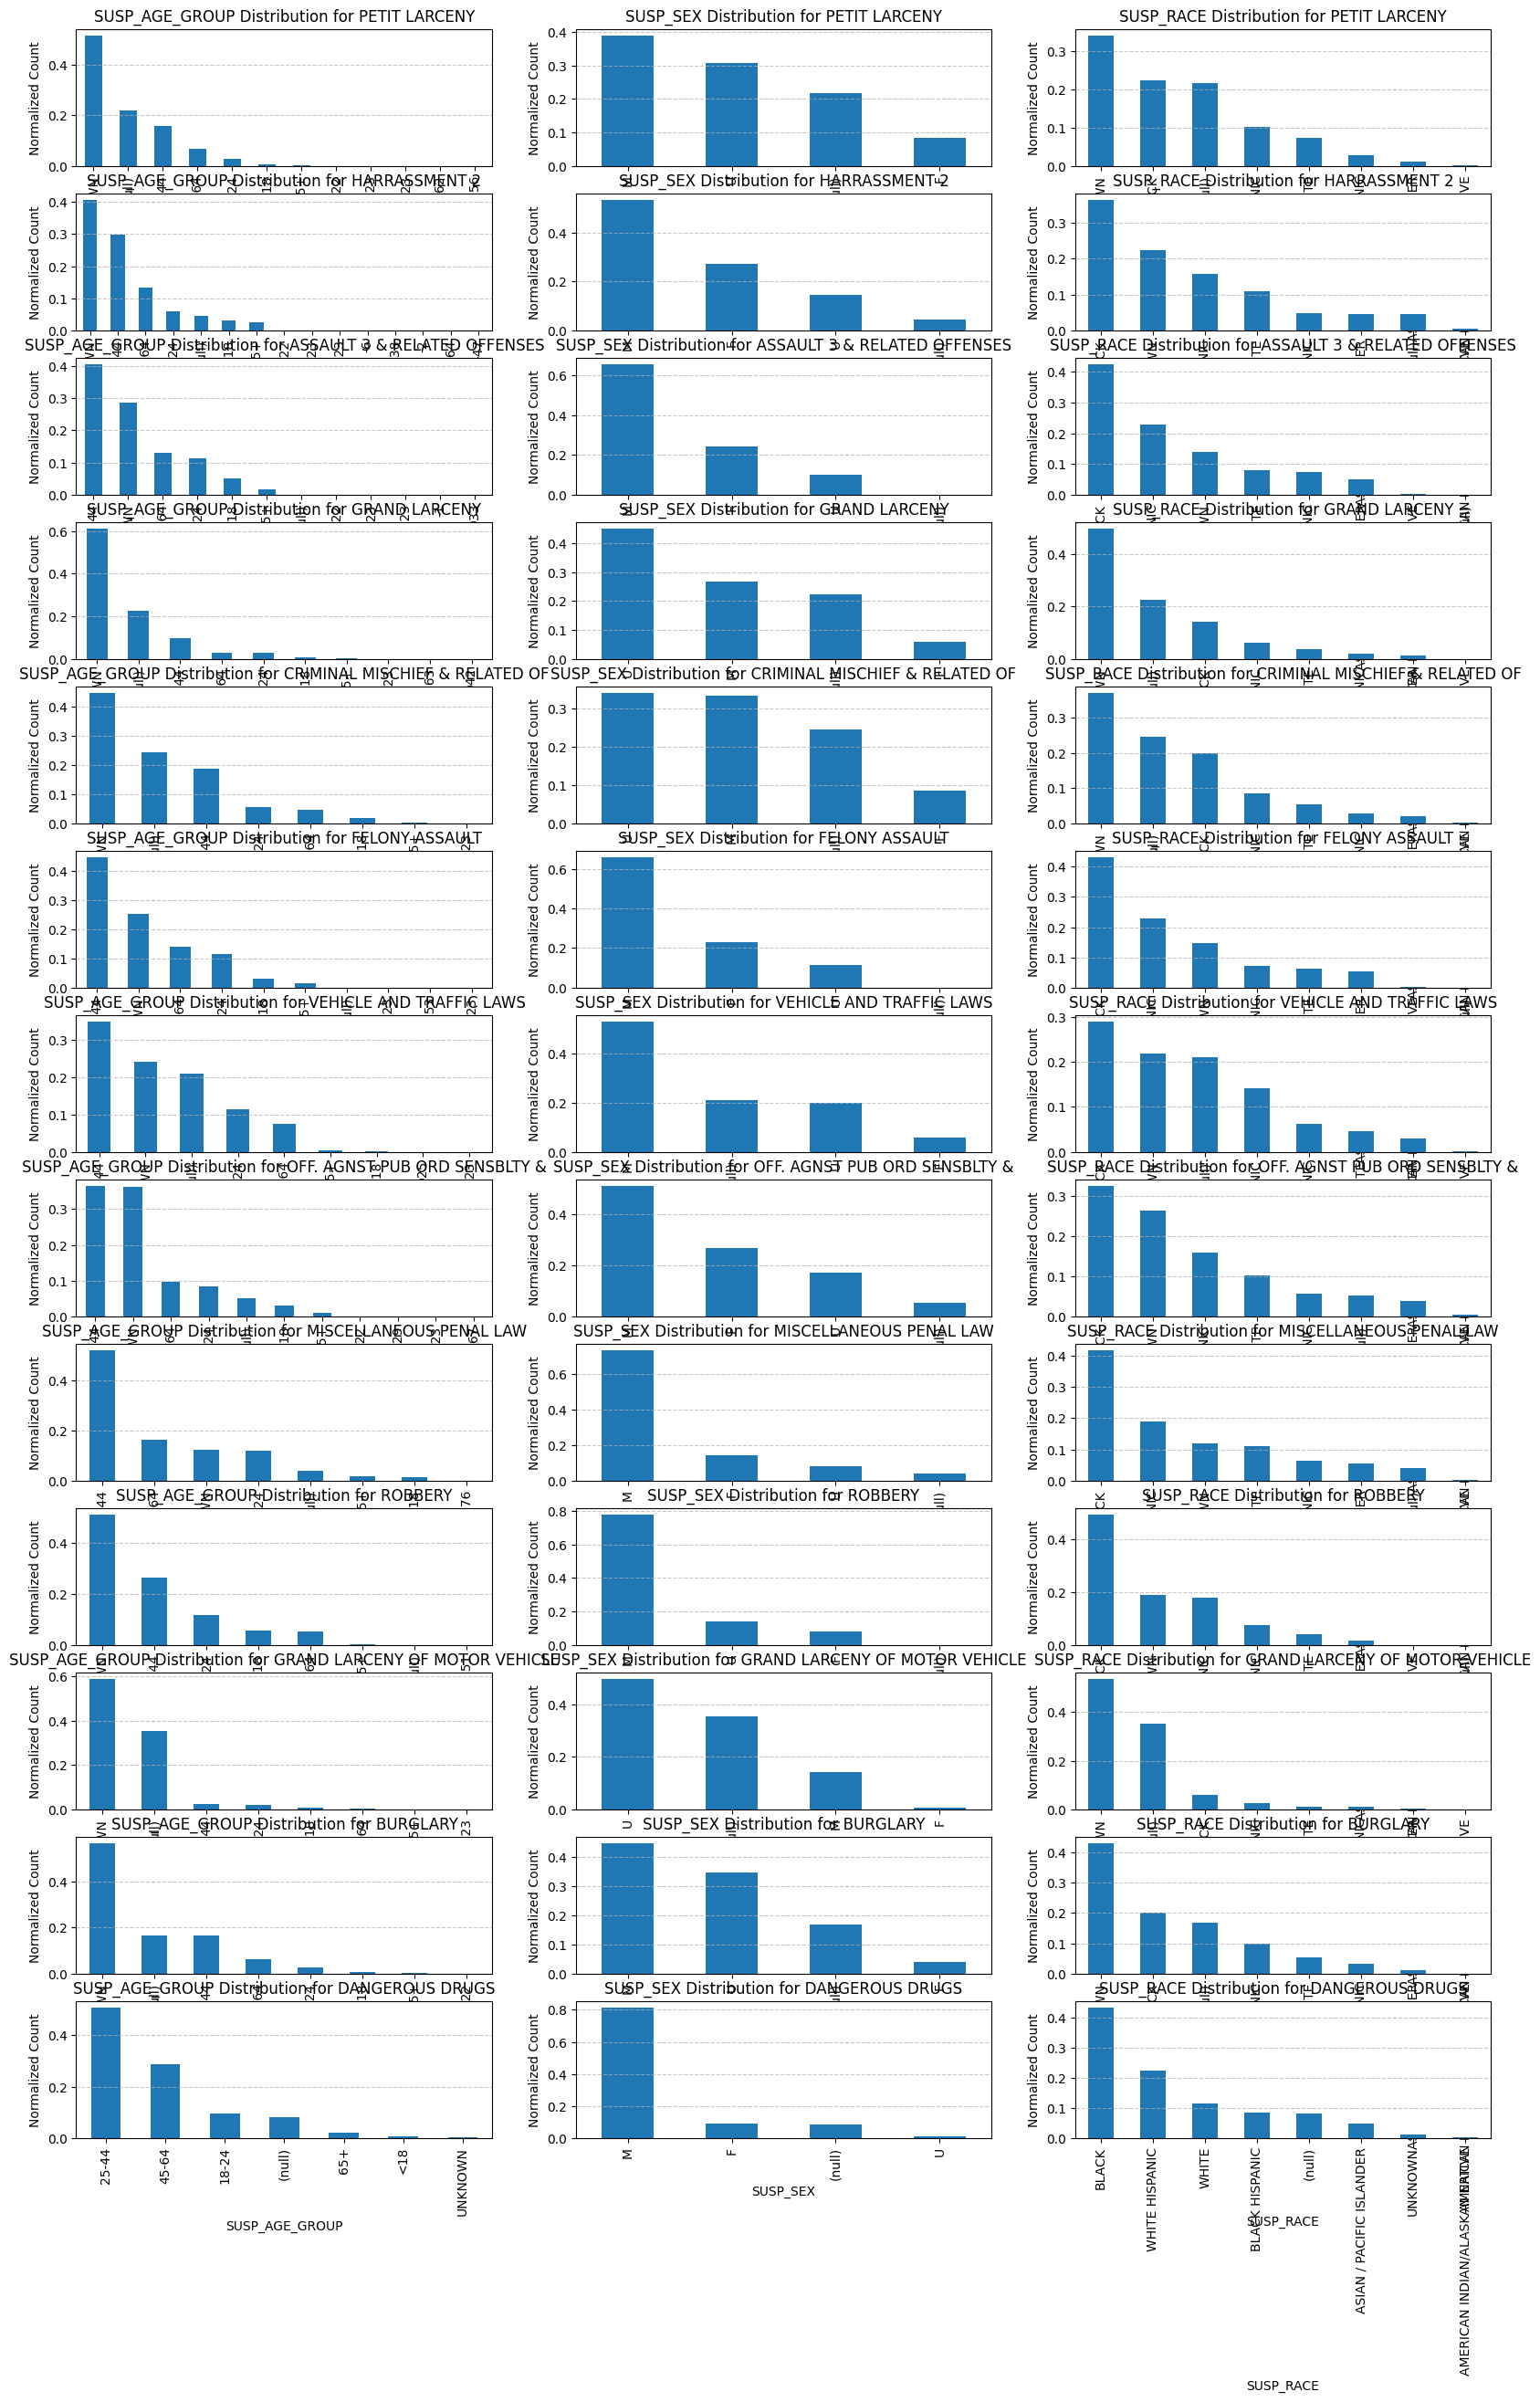

In [78]:
import matplotlib.pyplot as plt

# Define the list of columns to plot
columns_to_plot = ['VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']

top_crimes = df['OFNS_DESC'].value_counts().head(13).index.tolist()
# Create subplots for each crime and each suspect attribute
fig, axs = plt.subplots(nrows=len(top_crimes), ncols=len(suspect_columns), figsize=(20, 30))

# Plot the distribution for each crime and each suspect attribute
for i, crime in enumerate(top_crimes):
    for j, column in enumerate(suspect_columns):
        # Filter the DataFrame for the current crime
        crime_df = df[df['OFNS_DESC'] == crime]
        
        # Count the occurrences of each value in the current column
        value_counts = crime_df[column].value_counts(normalize=True)
        
        # Plot the bar graph for the current attribute
        ax = axs[i, j] if len(top_crimes) > 1 else axs[j]
        value_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'{column} Distribution for {crime}')
        ax.set_xlabel(column)
        ax.set_ylabel('Normalized Count')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [79]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print(f"Column '{column}' has {unique_values_count} unique values.")

Column 'CMPLNT_NUM' has 555117 unique values.
Column 'ADDR_PCT_CD' has 77 unique values.
Column 'BORO_NM' has 6 unique values.
Column 'CMPLNT_FR_DT' has 2117 unique values.
Column 'CMPLNT_FR_TM' has 1440 unique values.
Column 'CRM_ATPT_CPTD_CD' has 2 unique values.
Column 'HADEVELOPT' has 26 unique values.
Column 'HOUSING_PSA' has 375 unique values.
Column 'JURISDICTION_CODE' has 22 unique values.
Column 'JURIS_DESC' has 22 unique values.
Column 'KY_CD' has 68 unique values.
Column 'LAW_CAT_CD' has 3 unique values.
Column 'LOC_OF_OCCUR_DESC' has 6 unique values.
Column 'OFNS_DESC' has 64 unique values.
Column 'PARKS_NM' has 509 unique values.
Column 'PATROL_BORO' has 8 unique values.
Column 'PD_CD' has 374 unique values.
Column 'PD_DESC' has 365 unique values.
Column 'PREM_TYP_DESC' has 84 unique values.
Column 'RPT_DT' has 365 unique values.
Column 'STATION_NAME' has 369 unique values.
Column 'SUSP_AGE_GROUP' has 30 unique values.
Column 'SUSP_RACE' has 8 unique values.
Column 'SUSP_S

In [ ]:
import pandas as pd

# Select columns to one-hot encode
columns_to_encode = ['BORO_NM', 'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC',
                     'OFNS_DESC', 'PATROL_BORO', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE',
                     'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Day_of_Week']

# One-hot encode selected columns with numbers
encoded_df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

# Display the first few rows of the encoded DataFrame
encoded_df.head()
